# Simulation Problem 7
## ML HW_2

#### import libraries and load dataset

Reading the cdb files using the instruction of this repository: <br>
https://github.com/amir-saniyan/HodaDatasetReader

In [2]:
from HodaDataSetReader import read_hoda_dataset
import os
import matplotlib.pyplot as plt
import numpy as np

os.chdir("/home/kassra/ML/HW_4/data/DigitDB")
X_train, Y_train = read_hoda_dataset(dataset_path='Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)
X_test, Y_test = read_hoda_dataset(dataset_path='Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=True,
                              reshape=False)

#### Visualize some photos

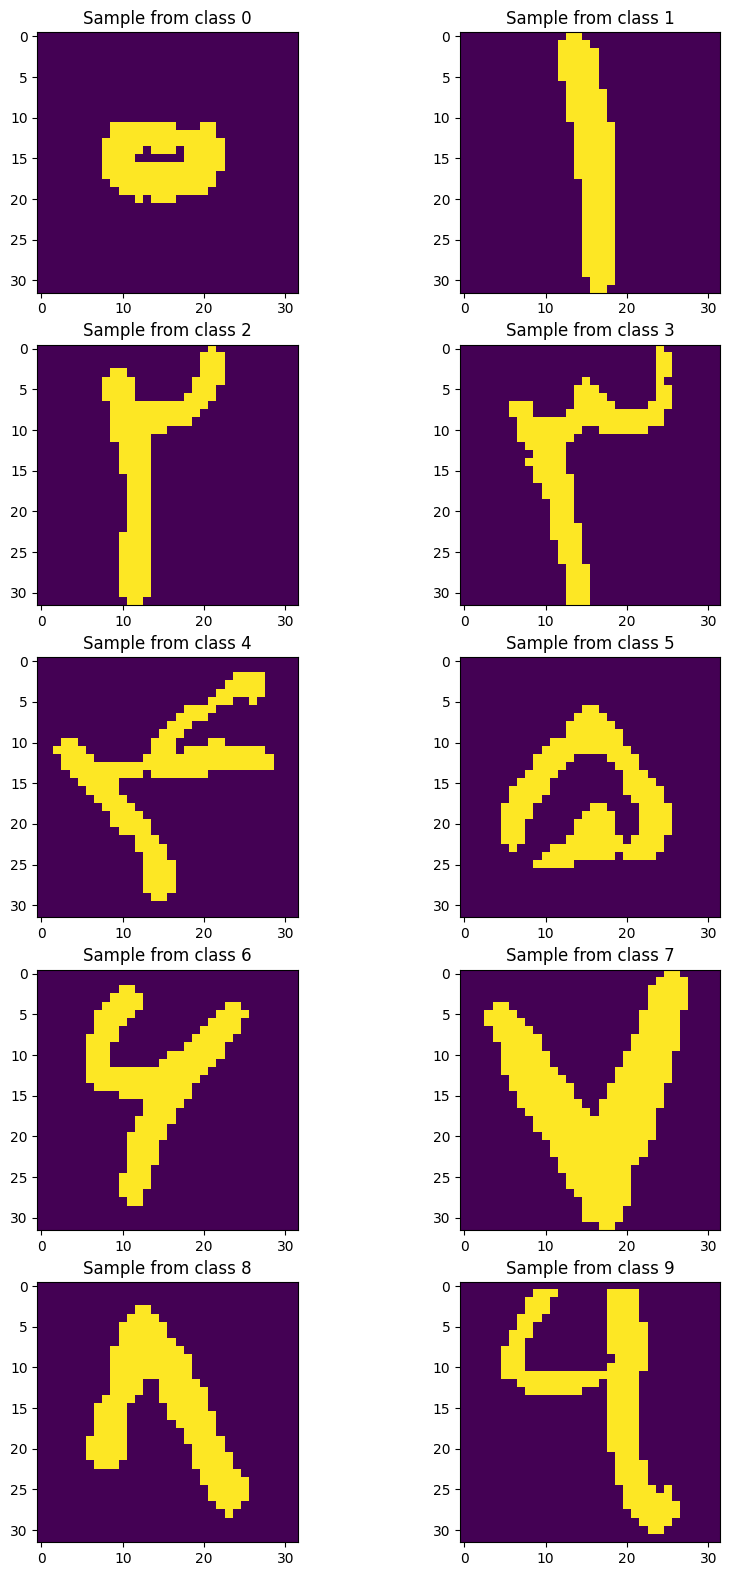

In [13]:
counter = 0
i = 0

fig, ax = plt.subplots(5, 2)
fig.set_dpi(100)
fig.set_size_inches(10, 20)

while counter != 10:
    if Y_train[i] == counter:
        ax[int(counter/2), counter%2].imshow(X_train[i].reshape(32,32))
        ax[int(counter/2), counter%2].set_title("Sample from class "+str(counter))
        counter += 1
        i = 0
    else:
        i += 1



#### K-NN Class for Classification

In [37]:
class KNN:
    def __init__(self, k, x, y):
        self.n_class = np.shape(np.unique(y))[0]
        self.n_sample = np.shape(x)[0]
        self.n_feature = np.shape(x)[1]
        self.k = k
        self.x = x
        self.y = y
        pass

    def dist(self, x, y):
        return np.linalg.norm(x - y, axis=1)

    def predict(self, x):
        y = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            distances = self.dist(self.x, np.tile(x[i],(self.n_sample,1)))
            neighbours_id = np.argpartition(distances, self.k)
            neighbours = self.x[neighbours_id]

            values, counts = np.unique(neighbours, return_counts=True)
            ind = np.argmax(counts)
            y[i] = values[ind]
        pass

classifier = KNN(5, X_train, Y_train)
